In [17]:
import numpy as np
import pandas as pd
import math
import statistics
from scipy import stats

#reading the csv file and displaying first 10 results as a reference for myself
belize_df = pd.read_csv('belize_airbnb_listings.csv')
belize_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203
5,120116,Valarosa,604999,Bobbi,Belize,Belize Islands,17.73644,-88.02858,Entire home/apt,171,2,49,3/23/2020,0.80,22,0
6,124794,Sabal Beach - secluded eco-retreat,562206,David & Wayne,Toledo,Toledo Mainland,16.28752,-88.54550,Entire home/apt,232,3,18,1/12/2020,0.16,2,338
7,152512,"Stunning one br apt-kitchen, air con, bikes & ...",733857,Jacki,Stann Creek,Stann Creek Mainland,16.52644,-88.37000,Entire home/apt,165,7,64,2/10/2021,0.57,5,298
8,152922,rent a private room in a house,735525,Jennifer,Cayo,Cayo,17.25395,-88.76870,Private room,52,1,11,12/14/2019,0.18,1,364
9,171294,King Deluxe,817242,Michael,Cayo,Cayo,17.16261,-89.06995,Private room,286,1,40,2/3/2020,0.47,8,362


# Arithmetic Mean

The average, called by summing all values and dividing by the number of values.

Example of Use: Aka average; works well on linear sets of data to find a "middle point"

In [6]:
# Example calculating the arithmetic mean

def mean_function(values):
    return sum(values)/len(values)

#test case
mean_function([1, 2, 3, 4, 5])

3.0

In [7]:
#Calculating mean using built in functions

values = [1, 2, 3, 4, 5]
print(statistics.mean(values))

3


In [23]:
#Application to Belize Airbnb data: calculating the average number of reviews

mean_function(belize_df["number_of_reviews"])

14.453505007153076

# Geometric Mean

The geometric mean takes the nth root (where n represents the size of the dataset considered or number of observations at hand) of the product of all of the values contained in the observed data.

Example of Use: calculating compound interest, better than arithmetic mean when looking at data with differing scales or units but can also cause the loss of a scale that we can interpret (drawback to using it in some cases)

In [10]:
#Writing a function to calculate the geometric mean

def gmean(values):
    return (np.prod(values))**(1/len(values))

#test case
gmean([1, 2, 3, 4, 5])

2.605171084697352

In [11]:
#Using just the built in function

from scipy.stats.mstats import gmean
values=[1, 2, 3, 4, 5]
gmean(values)

2.6051710846973517

In [24]:
#Applying geometric mean to Belize Airbnb data considering price (chose price because it is not a linear dataset-there are some
#very high priced outliers)
gmean(belize_df["price"])

234.7347175108817

# Harmonic Mean

The harmonic mean takes the reciprocal of all values of the observations in question then takes the arithmetic mean of those reciprocals and then, finally, takes the reciprocal of that number.

Example of Use: The harmonic mean is especially useful when looking at the speed traveled over a period of time where the speed is variable

In [12]:
#Mathematical description of harmonic mean

#harmonic_mean = ((sum(1/xi...1/xn))/n)**-1

#using built-in functions to calculate the harmonic mean
values=[1, 2, 3, 4, 5]
statistics.harmonic_mean(values)

2.18978102189781

In [28]:
#I couldn't think of a great example of where we would use harmonic mean with this dataset, so I chose to look
#at availability_365 since that is a number that potentially could change seasonally or by month or aligning with school
#holidays, etc. It doesn't really apply here because we just have one value but that's ok for an example.
#I also look at examples from reviews_per_month and price.

statistics.harmonic_mean(belize_df['availability_365'])

statistics.harmonic_mean(belize_df['reviews_per_month'])

statistics.harmonic_mean(belize_df['price'])

170.9933850102646

# Linear vs. Rank Correlation

## Linear Correlations & Pearson Correlation Coefficient
Linear correlation is a measurement of how closely a set of variables of features of a particular dataset are related to a linear function.

The Pearson (or product-moment) correlation coefficient is a numerical representation of the linear correlation between features of a given dataset and is denoted as the letter r. Values of r range from -1 (perfect negative linear correlation) to 1 (perfect positive linear correlation) with 0 indicating no linear correlation between values.

### Implementation in Python
linear_regression = scipy.stats.linregress(x,y) is used to calculate a linear regression with a given set of x and y values or observations. 

Basic statistics can be calculated in Python in the following manner:
r: linear_regression.rvalue

The same basic command holds true for p values, standard error, slope, and intercept 

A summary of the statistics can also be calculated using the following:
scipy.stats.linregress(xy)

Using scipy and numpy:
r_value, p_value = scipy.stats.pearsonr(x, y)
np.corrcoef(x, y)


## Rank correlation
Rather than comparing values to a linear function, a rank correlation insteads considers just the order/rank of the variables or features.

The Spearman correlation coefficient is used for rank correlations and is typically denoted by the greek letter rho and is called Spearman's correlation coefficient or Spearman's rho. Here, the ranks for x and y pairs are used rather than their actual values.Rho also varies between -1 to 1 where 1 indicates that whenever x is increasing so is y (and vice versa) and -1 indicates that when x is increasing y is decreasing (and vice versa).

Can be considered in Python using:
scipy.stats.rankdata()

scipy.stats.spearman(x, y)

scipy.stats.kendalltau(x, y)

Example in pandas:
xy.corr(method='spearman')

## Investigating Belize Airbnb Data

In [29]:
listings=belize_df['calculated_host_listings_count'];

In [30]:
availability = belize_df['availability_365']

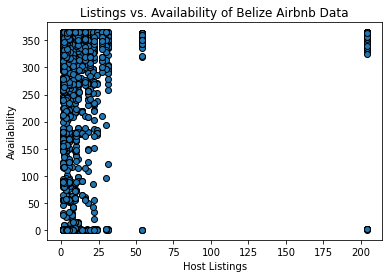

In [34]:
import matplotlib.pyplot as plt
plt.scatter(listings, availability, edgecolors='k')
plt.title('Listings vs. Availability of Belize Airbnb Data')
plt.xlabel('Host Listings')
plt.ylabel('Availability')
plt.show()

In [37]:
r = np.corrcoef(listings, availability)
print(r)

[[1.         0.17275503]
 [0.17275503 1.        ]]


In [ ]:
#The r value is a small positive number. This indicates that the strength of the correlation between the count of 
#host listings and the availability of the Airbnb unit is very low. There is a very slight positive correlation 
#which indicates that as the count of host listings increases, there is a slight tendency for the availability to increase.